In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import math

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
ds_free = xr.open_dataset('../Data/hycom_free_ssh.nc')
ds_free = ds_free.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci = xr.open_dataset('../Data/hycom_cci_ssh.nc')
ds_cci = ds_cci.sel(time=slice('2009-01-01','2014-06-04'))

ds_cmems = xr.open_dataset('../Data/cmems_ssh.nc')
ds_cmems = ds_cmems.sel(time=slice('2009-01-01','2014-06-04'))

# ds_cci_regrid = xr.open_dataset('../Data/hycom_cci_ssh_regrid.nc')
# ds_cci_regrid = ds_cci_regrid.sel(time=slice('2009-01-01','2014-06-04'))

# # ensure CMEMS and regridded HYCOM lats and lons are exactly the same
# ds_cci_regrid['latitude'] = ds_cmems['latitude']
# ds_cci_regrid['longitude'] = ds_cmems['longitude']

# Timeseries

## Timeseries locations

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


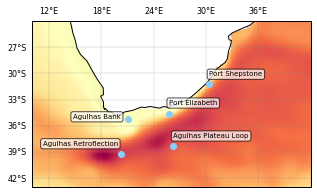

<Figure size 432x288 with 0 Axes>

In [47]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((10, 42, -42, -24))

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

### plotting timeseries locations ##########################################################################
# Port Shepstone current core
ax.plot(30.39, -31.23, color='lightskyblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(30.39, -30.33, 'Port Shepstone', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Port Elizabeth current core
ax.plot(25.77, -34.63, color='lightskyblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(25.77, -33.63, 'Port Elizabeth', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Agulhas Retroflection
ax.plot(20.28, -39.24, color='lightskyblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(11.28, -38.30, 'Agulhas Retroflection', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Agulhas Plateau Loop
ax.plot(26.27, -38.31, color='lightskyblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(26.27, -37.41, 'Agulhas Plateau Loop', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Agulhas Bank
ax.plot(21.05, -35.21, color='lightskyblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(14.75, -35.21, 'Agulhas Bank', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))


###########################################################################################################

img = ds_free['ssh'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, vmin=-1.2, vmax=1.2)
# cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
# cbar.set_label('Velocity (cm.s$^{-1}$)', fontsize=9)
ax.set_title('')
# plt.savefig('../Figures/reference/Agulhas_locations_SSH.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [39]:
# Agulhas region
#=====================================================================================================================================

# Port Shepstone current core
ps_free = ds_free.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.64)).mean(dim=('longitude','latitude'), skipna=True)
ps_cci = ds_cci.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.64)).mean(dim=('longitude','latitude'), skipna=True)
ps_cmems = ds_cmems.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.64)).mean(dim=('longitude','latitude'), skipna=True)

# Port Elizabeth current core
pe_free = ds_free.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_cci = ds_cci.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_cmems = ds_cmems.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)

# Retroflection
ret_free = ds_free.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_cci = ds_cci.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_cmems = ds_cmems.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)

# Agulhas Plateau loop
apl_free = ds_free.sel(latitude=slice(-38.31,-38.12),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_cci = ds_cci.sel(latitude=slice(-38.31,-38.12),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_cmems = ds_cmems.sel(latitude=slice(-38.31,-38.12),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)

# Agulhas Bank
aba_free = ds_free.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_cci = ds_cci.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_cmems = ds_cmems.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)


### Port Shepstone current core

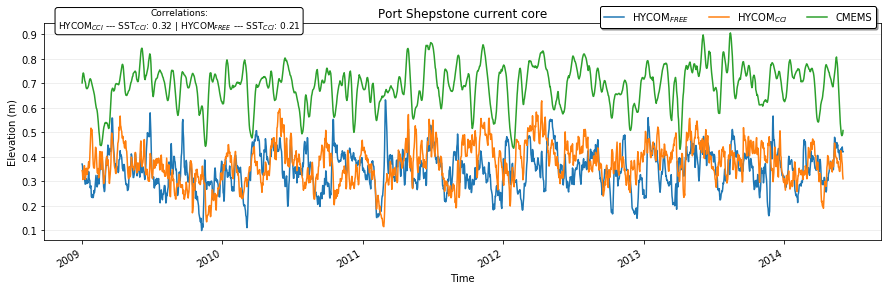

In [31]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(ps_cci['ssh'],ps_cmems['adt'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(ps_free['ssh'],ps_cmems['adt'])[0,1],2)

fig = plt.figure(figsize=(15,4))
ps_free['ssh'].plot.line(x='time',label='HYCOM$_{FREE}$')
ps_cci['ssh'].plot.line(x='time',label='HYCOM$_{CCI}$')
ps_cmems['adt'].plot.line(x='time',label='CMEMS')
plt.title('Port Shepstone current core')
plt.ylabel('Elevation (m)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.89, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/ssh/TimeSeries_PortShepstone.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### Port Elizabeth current core

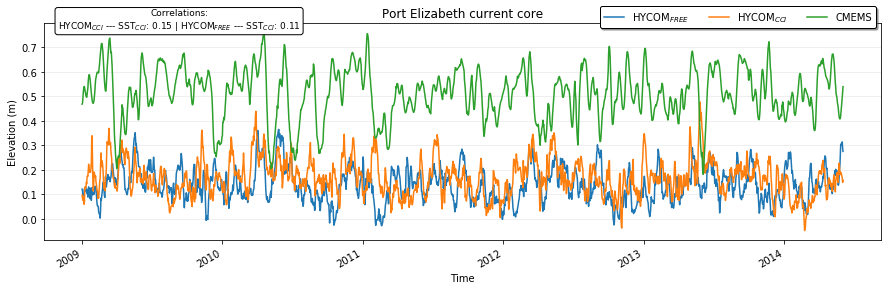

In [33]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(pe_cci['ssh'],pe_cmems['adt'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(pe_free['ssh'],pe_cmems['adt'])[0,1],2)

fig = plt.figure(figsize=(15,4))
pe_free['ssh'].plot.line(x='time',label='HYCOM$_{FREE}$')
pe_cci['ssh'].plot.line(x='time',label='HYCOM$_{CCI}$')
pe_cmems['adt'].plot.line(x='time',label='CMEMS')
plt.title('Port Elizabeth current core')
plt.ylabel('Elevation (m)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.89, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/ssh/TimeSeries_PortElizabeth.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### Agulhas retroflection

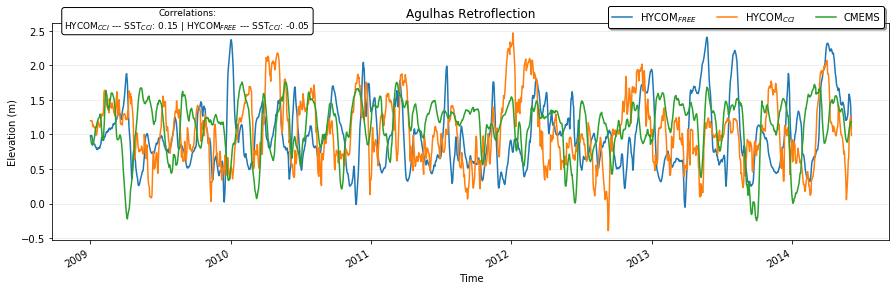

In [35]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(ret_cci['ssh'],ret_cmems['adt'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(ret_free['ssh'],ret_cmems['adt'])[0,1],2)

fig = plt.figure(figsize=(15,4))
ret_free['ssh'].plot.line(x='time',label='HYCOM$_{FREE}$')
ret_cci['ssh'].plot.line(x='time',label='HYCOM$_{CCI}$')
ret_cmems['adt'].plot.line(x='time',label='CMEMS')
plt.title('Agulhas Retroflection')
plt.ylabel('Elevation (m)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.89, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/ssh/TimeSeries_AgulhasRetroflection.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### Agulhas Plateau loop

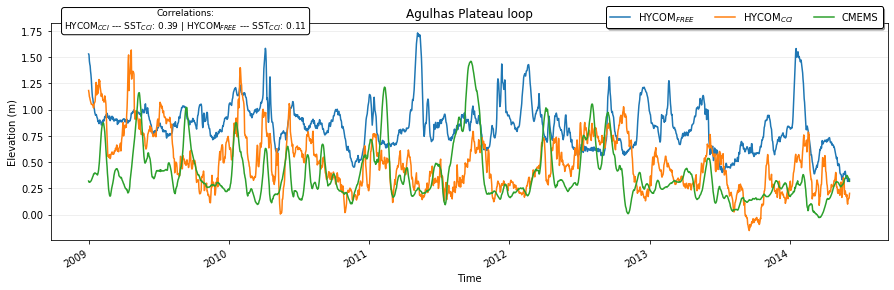

In [41]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(apl_cci['ssh'],apl_cmems['adt'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(apl_free['ssh'],apl_cmems['adt'])[0,1],2)

fig = plt.figure(figsize=(15,4))
apl_free['ssh'].plot.line(x='time',label='HYCOM$_{FREE}$')
apl_cci['ssh'].plot.line(x='time',label='HYCOM$_{CCI}$')
apl_cmems['adt'].plot.line(x='time',label='CMEMS')
plt.title('Agulhas Plateau loop')
plt.ylabel('Elevation (m)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.89, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/ssh/TimeSeries_AgulhasPlateauloop.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### Agulhas Bank

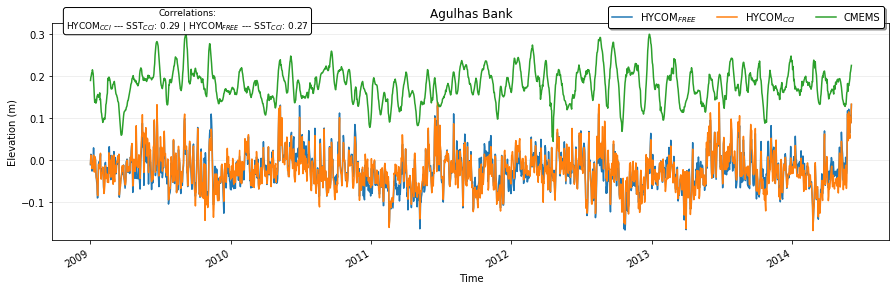

In [43]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(aba_cci['ssh'],aba_cmems['adt'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(aba_free['ssh'],aba_cmems['adt'])[0,1],2)

fig = plt.figure(figsize=(15,4))
aba_free['ssh'].plot.line(x='time',label='HYCOM$_{FREE}$')
aba_cci['ssh'].plot.line(x='time',label='HYCOM$_{CCI}$')
aba_cmems['adt'].plot.line(x='time',label='CMEMS')
plt.title('Agulhas Bank')
plt.ylabel('Elevation (m)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.89, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/ssh/TimeSeries_AgulhasBank.png', dpi=300, bbox_inches='tight', format='png')

plt.show()